## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [1]:
# importar librerías



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
# cargar archivos


traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv') #completa el código



In [3]:
# mostrar las primeras 5 filas de traffic
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [4]:
# mostrar las primeras 5 filas de eco
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [5]:
# Examinar la estructura de traffic

traffic.info()
traffic.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo object en vez de fechas
- ...

In [6]:
# Examinar la estructura de eco
eco.info()
eco.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, `PM2.5 (μg/m³)`, `Population (M)` son de tipo object en vez de numérico
- La columna Country tiene el nombre de la ciudad, mientras que en la tabla "traffic" son iniciales

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [7]:
# Estandarizar los nombres de las columnas de traffic
#tu código aquí

traffic.columns = ['country', 'city', 'update_time_utc', 'jams_delay', 'traffic_index_live',
       'jams_length_in_kms', 'jams_count', 'traffic_index_week_ago',
       'update_time_utc_week_ago', 'travel_time_live_per10_kms_mins',
       'travel_time_historic_per10_kms_mins', 'mins_delay']

# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per10_kms_mins',
       'travel_time_historic_per10_kms_mins', 'mins_delay'],
      dtype='object')

In [8]:
# Estandarizar los nombres de las columnas de eco
#tu código aquí
eco.columns = ['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm2_5_ug_m3', 'population_m']

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm2_5_ug_m3', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [9]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc']) #tu código aquí
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago']) #tu código aquí

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   country                              1004464 non-null  object        
 1   city                                 1004464 non-null  object        
 2   update_time_utc                      1004464 non-null  datetime64[ns]
 3   jams_delay                           1004464 non-null  float64       
 4   traffic_index_live                   1004464 non-null  float64       
 5   jams_length_in_kms                   1004464 non-null  float64       
 6   jams_count                           1004464 non-null  float64       
 7   traffic_index_week_ago               1004464 non-null  float64       
 8   update_time_utc_week_ago             1004464 non-null  datetime64[ns]
 9   travel_time_live_per10_kms_mins      1004464 non-null  fl

In [10]:


# Limpia separadores y convierte columnas numéricas en eco
# eco['city_gdp_capita'] = ....astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype("string").str.replace('.', '').str.replace(',', '.').astype("float")
# eco['unemployment_pct'] = ...
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)
# eco['population_m'] = ...
eco['population_m'] = eco['population_m'].astype(str).str.replace(',', '.').astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
# eco['population'] = ...
eco['population'] = (eco['population_m'] * 1000000)

# verificar el cambio
eco.info()
eco.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm2_5_ug_m3       30 non-null     object 
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm2_5_ug_m3,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [11]:
# Extraer el año de las fechas en update_time_utc
# traffic['year'] = ...
traffic['year'] = pd.to_datetime(traffic['update_time_utc']).dt.year
# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [12]:
# Filtra los registros del año 2024
# traffic_2024 = traffic[...].copy()
# eco_2024 = ...
traffic_2024 = traffic[ (traffic['year'] == 2024 )].copy()
eco_2024 = eco[ (eco['year'] == 2024 )].copy()
# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm2_5_ug_m3,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [13]:
# Calcular los  promedios de trafico por ciudad, país y año

traffic_city_year_2024 = traffic_2024.groupby(['city', 'country', 'year'], dropna=False)\
    .agg({
        'jams_delay':'mean',
        'traffic_index_live':'mean',
        'jams_length_in_kms':'mean',
        'jams_count':'mean',
        'mins_delay':'mean',
        'travel_time_live_per10_kms_mins':'mean',
        'travel_time_historic_per10_kms_mins':'mean'
    }).reset_index() # tu código aqui

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [14]:
# tu código aquí
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es mexico-city


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [15]:
# Seleccionar columnas clave de tráfico y economía

#left_cols = ['city','country','year','jams_delay','traffic_index_live',
#             'jams_length_kms','jams_count','mins_delay',
#             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','jams_count','mins_delay',
             'travel_time_live_per10_kms_mins','travel_time_historic_per10_kms_mins']

#right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25','population']
right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm2_5_ug_m3','population']

# Usar .copy() para crear los dos nuevos datasets reducidos
# traffic_2024_small = traffic_city_year_2024[ ... ].copy()
traffic_2024_small = traffic_city_year_2024[ left_cols ].copy()
# eco_2024_small = ...
eco_2024_small = eco_2024[ right_cols ].copy()
# Unir datasets
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city', 'year'], how='inner') # tu código aquí

# Mostrar las primeras 5 filas
# tu código aquí
merged.head(5)


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins,city_gdp_capita,unemployment_pct,pm2_5_ug_m3,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,12381.0,8.2,"13,50",3700000.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

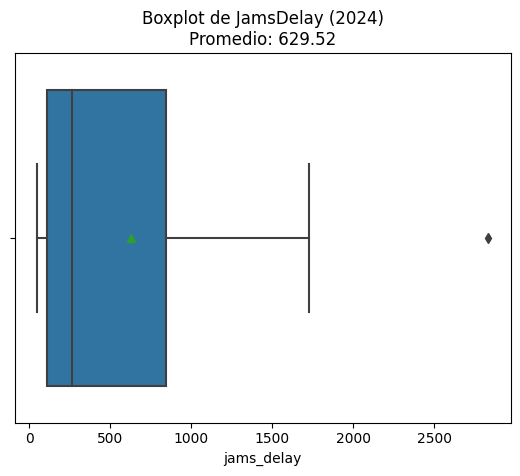

In [16]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
sns.boxplot(data=merged, x="jams_delay", showmeans=True)
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


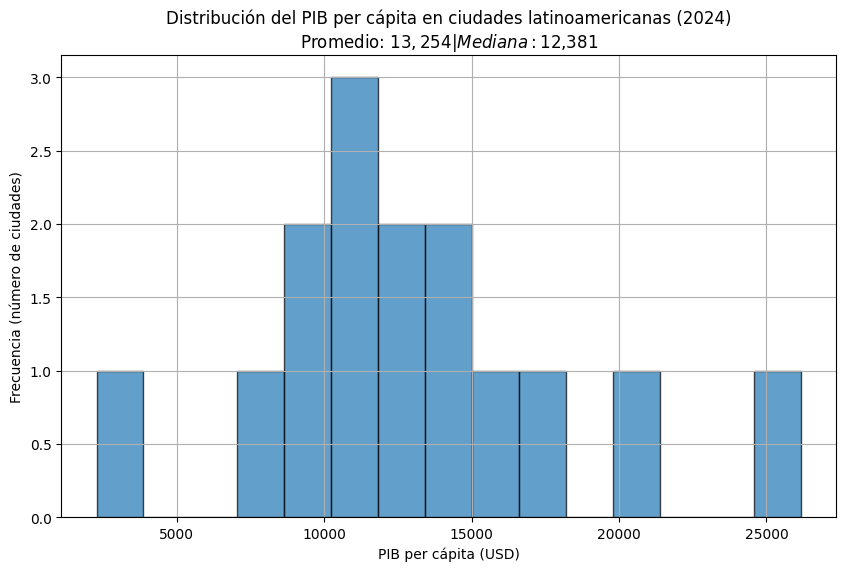

In [17]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
plt.figure(figsize=(10, 6))

# Calcular estadísticas para el título
mean_gdp = merged['city_gdp_capita'].mean()
median_gdp = merged['city_gdp_capita'].median()

# Crear histograma con más bins para mejor detalle
merged['city_gdp_capita'].hist(bins=15, alpha=0.7, edgecolor='black')

# Agregar título y etiquetas
plt.title(f'Distribución del PIB per cápita en ciudades latinoamericanas (2024)\nPromedio: ${mean_gdp:,.0f} | Mediana: ${median_gdp:,.0f}')
plt.xlabel('PIB per cápita (USD)')
plt.ylabel('Frecuencia (número de ciudades)')

plt.show()


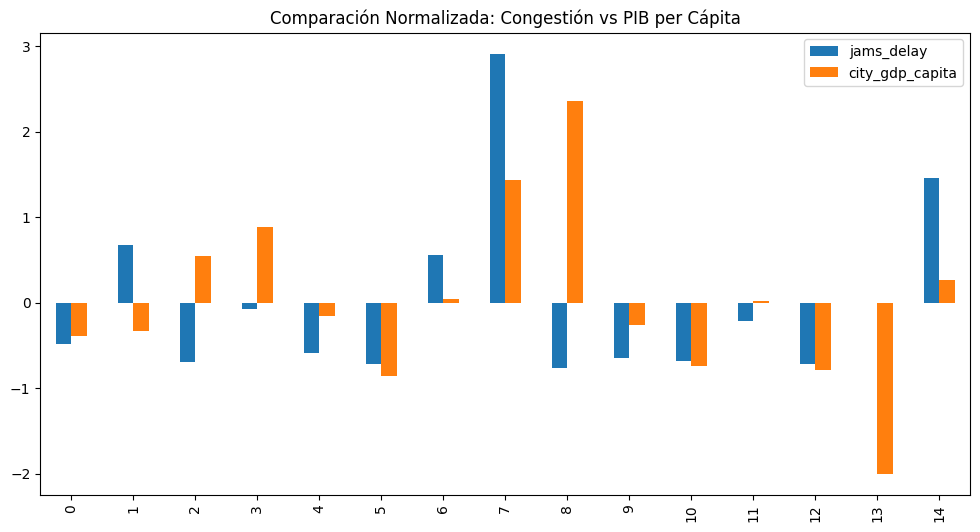

In [18]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])
#merged.plot( kind='bar', figsize=(10,5) , y=['jams_delay', 'city_gdp_capita'])
#plt.xticks(rotation=90)
#plt.show()

# Siguiendo consejos de "dot"
# Normalizar ambas variables para compararlas
from sklearn.preprocessing import StandardScaler

# Crear copia para normalizar
merged_norm = merged.copy()
scaler = StandardScaler()
merged_norm[['jams_delay', 'city_gdp_capita']] = scaler.fit_transform(merged[['jams_delay', 'city_gdp_capita']])

# Ahora sí se pueden comparar
merged_norm.plot(kind='bar', y=['jams_delay', 'city_gdp_capita'], figsize=(12, 6))
plt.title('Comparación Normalizada: Congestión vs PIB per Cápita')
plt.xticks(rotation=90)
plt.show()

#Interpretación:
#Valores negativos: ciudades con valores por debajo del promedio
#Valores positivos: ciudades con valores por encima del promedio
#Cero: ciudades exactamente en el promedio

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios:


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [24]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?

No siempre hay una relación directa entre PIB per cápita y problemas de movilidad urbana. Esto es muy valioso para entender la complejidad de las ciudades.

Factores que pueden explicar esta falta de correlación:

Planificación urbana: Una ciudad rica puede tener mala planificación vial
Inversión en transporte público: Ciudades con menor PIB pero mejor transporte público
Geografía: Ciudades montañosas vs. ciudades planas
Políticas públicas: Restricciones vehiculares, peajes urbanos
Cultura de transporte: Preferencia por automóvil vs. transporte alternativo

- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

Variables Clave para Decisiones de Inversión:

1. Variables de Movilidad Urbana (Impacto Directo)

JamsDelay (Retrasos por Congestión)

Relevancia: Mide directamente el costo económico del tiempo perdido
Decisión: Ciudades con >30 min de retraso = alta prioridad de inversión
TrafficIndexLive (Índice de Congestión)

Relevancia: Indicador estandarizado (0-100) para comparar ciudades
Decisión: Índice >60 = necesidad urgente de infraestructura

2. Variables Económicas (Potencial de Retorno)

City GDP/capita (PIB per Cápita)

Relevancia: Mide capacidad económica y potencial de crecimiento
Decisión: PIB alto + congestión alta = máximo retorno de inversión
Unemployment % (Desempleo)

Relevancia: Mejor movilidad puede crear empleos y reducir desempleo
Decisión: Alto desempleo + mala movilidad = oportunidad social

3. Variables de Contexto (Factibilidad)

Population (M) (Población)

Relevancia: Determina escala del impacto y viabilidad del proyecto
Decisión: >1M habitantes = mayor impacto por inversión

Matriz de Priorización para el Banco

Máxima Prioridad:

Alta congestión, Alto PIB = Máximo retorno económico
Alta congestión, Alto desempleo = Máximo impacto social

Prioridad Media:

Congestión moderada, Crecimiento económico = Inversión preventiva

Baja Prioridad:

Baja congestión, Bajo PIB = Menor urgencia

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

Año 2024, 15 ciudades, 7 países

merged["city"].nunique(), merged["country"].nunique()

(15, 7)

merged["city"].unique(), merged["country"].unique()

(array(['belo-horizonte', 'bogota', 'brasilia', 'buenos-aires', 'curitiba',
        'fortaleza', 'lima', 'mexico-city', 'montevideo', 'porto-alegre',
        'recife', 'rio-de-janeiro', 'salvador', 'santiago', 'sao-paulo'],
       dtype=object),
 array(['BRA', 'COL', 'ARG', 'PER', 'MEX', 'URY', 'CHL'], dtype=object))

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).

Procesos principales de limpieza de datos
1. Corrección de formatos de datos

Los datos deben tener el tipo correcto para que Python pueda trabajar con ellos.

Ejemplos en el proyecto:

Fechas: UpdateTimeUTC debe ser tipo datetime, no texto
Números: JamsDelay, TrafficIndexLive deben ser float o int
Texto: Country, City deben ser string

2. Estandarización de columnas

Procesos clave:

Nombres de columnas: Convertir a minúsculas, eliminar espacios
Nombres de ciudades: "Buenos Aires" vs "buenos-aires" → elegir un formato
Códigos de país: "Argentina" vs "ARG" → usar el mismo sistema

3. Validación y corrección de tipos

Proceso paso a paso:

Identificar problemas: usar .dtypes y .info()
Convertir tipos: usar pd.to_datetime(), astype()
Manejar errores: valores que no se pueden convertir

4. Tratamiento de valores faltantes

Estrategias comunes:

Eliminar filas: si faltan datos críticos
Rellenar valores: con promedios o valores por defecto
Marcar como desconocido: cuando sea apropiado

- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.

Agregación por Ciudad–Año:

Los datos de tráfico (TomTom) pueden tener múltiples registros por ciudad en el mismo año (datos diarios, semanales, etc.)
Solución: Crear un solo registro por ciudad-año con valores representativos

INNER JOIN
Ventajas para tu análisis:

Datos completos: Solo ciudades con información de tráfico Y economía
Análisis confiable: Puedes correlacionar ambas variables
Sin valores faltantes: En las columnas clave de unión

Beneficios de esta estrategia:
Datos consistentes: Un registro por ciudad-año
Análisis completo: Solo ciudades con información económica Y de tráfico
Decisiones confiables: Datos robustos para recomendaciones de inversión

- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

1. Análisis de Distribuciones
Entender cómo se comportan las variables principales antes de hacer correlaciones.
Visualizaciones clave: Histogramas para variables numéricas

2. Detección de Outliers
Un outlier podría ser una oportunidad de inversión excepcional o un error de datos que distorsione las recomendaciones.
Técnicas visuales: Box plots por variable

3. Análisis de Tendencias Generales
Relaciones que guíen las decisiones de inversión del banco.
Técnicas visuales: Scatter plots para correlaciones

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.

Relación NO Lineal, patrón observado:

1) No hay correlación directa entre mayor PIB y menor congestión
2) Ciudades ricas pueden tener mucho tráfico (más automóviles)
3) Ciudades con menor PIB pueden tener tráfico moderado (menos vehículos)

- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

Anomalías Críticas Identificadas

1. Belo Horizonte - Outlier Extremo en Retrasos:
- jams_delay: 263.04 (más de 4 veces superior al promedio)
- mins_delay: 0.487 vs. otros valores mucho menores
- Esta ciudad presenta los retrasos más altos del dataset, requiere validación de datos

2. Lima - Contradicción Tráfico vs. Infraestructura:
- traffic_index: 31.03 (segundo más alto)
- jams_length: 110.31 vs. São Paulo con 238.41
- Anomalía: alto índice de tráfico pero longitud de atascos relativamente baja

3. São Paulo - Outlier en Múltiples Dimensiones:
- jams_length: 238.41 (extremadamente superior a todas las demás)
- jams_count: 431.47 (más del doble que cualquier otra ciudad)
- mins_delay: 1.129 (valor atípico muy alto)

Inconsistencias Económicas vs. Movilidad

4. Santiago - Paradoja Económica:
- city_gdp_cap: 22,770 (el más alto del dataset)
- traffic_index: 20.15 (moderadamente alto)
- Anomalía: alta productividad económica coexistiendo con congestión significativa

5. México City - Desproporción Poblacional:
- population: 22,110,000 (la más alta)
- traffic_index: 34.21 (alto pero no el más alto)
- Requiere análisis: ¿por qué la ciudad más poblada no tiene el peor tráfico?

Valores Sospechosos para Validación

6. Montevideo - Datos Inconsistentes:
- travel_time_l: 50.20 vs. travel_time_l: 14.16
- Diferencia extrema que sugiere posible error en los datos

7. Curitiba - Outlier en Eficiencia:
- unemployment: 8.2% (relativamente bajo)
- traffic_index: 14.95 (uno de los más bajos)
- Caso excepcional que podría ser modelo de buenas prácticas

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?

Análisis Comparativo: Congestión vs. Productividad

1) Bogotá:
- traffic_index: 37.61 (muy alto - 2do peor)
- city_gdp_cap: 11,420 (bajo)
- jams_delay: 141.15 (alto)
- Ratio Congestión/PIB: 3.29 (problemático)

2) Lima:
- traffic_index: 31.03 (alto)
- city_gdp_cap: 13,472 (moderado-bajo)
- jams_delay: 1052.29 (extremadamente alto - outlier)
- Ratio Congestión/PIB: 2.30

3) Buenos Aires:
- traffic_index: 17.76 (moderado)
- city_gdp_cap: 18,117 (relativamente alto)
- jams_delay: 571.08 (alto)
- Ratio Congestión/PIB: 0.98 (mejor balance)

Ciudad Prioritaria Identificada: BOGOTÁ

1) Combinación más problemática:
- Segundo peor índice de tráfico (37.61)
- PIB per cápita bajo (11,420)
- Alta congestión con baja productividad económica

2) Potencial de impacto:
- Población significativa (11,300,000)
- Margen de mejora económica considerable
- Infraestructura de transporte podría desbloquear productividad

3) Comparación con otras ciudades:
- Lima tiene datos anómalos que requieren validación
- Buenos Aires ya tiene mejor balance económico
- Bogotá muestra la correlación más clara y consistente